In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set plot style
sns.set_theme(style="whitegrid")

# --- Load Dataset ---
# Ensure 'emails.csv' is in the same directory.
file_path = "emails_16_17_18_19.csv"
try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully.")
    
    # --- Preprocessing ---
    # Drop 'Email No.' as it's an identifier, not a feature.
    if 'Email No.' in df.columns:
        df = df.drop(columns=['Email No.'])
    
    # Separate features (X) and target (y)
    X = df.drop(columns=['Prediction']).values
    y = df['Prediction'].values
    
    # Convert labels to -1 (Not Spam) and 1 (Spam) for SVM
    # Assuming original labels are 0 (Not Spam) and 1 (Spam)
    y = np.where(y == 0, -1, 1)

    # Split into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training samples: {X_train.shape[0]}")
    print(f"Testing samples: {X_test.shape[0]}")

except FileNotFoundError:
    print(f"❌ Error: File '{file_path}' not found.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

✅ Dataset loaded successfully.
Training samples: 4137
Testing samples: 1035


In [4]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [5]:
if 'X_train' in locals():
    print("Training SVM model...")
    # Initialize and train SVM
    # Lower learning rate and more iterations might be needed for convergence
    svm = SVM(learning_rate=0.0001, lambda_param=0.001, n_iters=500) 
    svm.fit(X_train, y_train)
    print("Training complete.")

    # Make predictions
    y_pred = svm.predict(X_test)

Training SVM model...
Training complete.


--- Model Performance ---
Accuracy:  0.9720
Precision: 0.9525
Recall:    0.9493
F1 Score:  0.9509


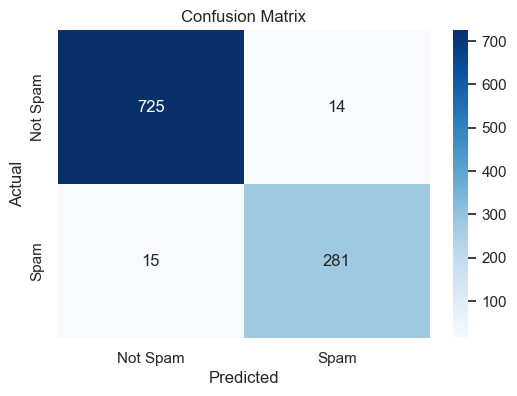

In [7]:
if 'y_pred' in locals():
    print("--- Model Performance ---")
    # Convert labels back to 0 and 1 for standard metric calculation if preferred, 
    # or keep as -1/1. Standard metrics handle -1/1 fine.
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1) # Focus on Spam class (1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()